### URL Tableau Dashboard
---

[DASHBOARD VISUALISASI] (https://public.tableau.com/app/profile/rifky.iqbal5811/viz/UsedCarsDatasetVisual/DashboardVisual?publish=yes)

[DASHBOARD ANALYSIS] (https://public.tableau.com/app/profile/rifky.iqbal5811/viz/UsedCarsDataset/DashboardAnalysis)

Import Libraries

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

np.random.seed(10)

## **i. Perkenalan**


Nama : Rifky Iqbal Algifari  
Batch : CODA-RMT-007

Program ini bertujuan untuk melihat faktor-faktor yang mempengaruhi penjualan mobil bekas dari dataset yang diperoleh di kaggle

## **ii. Identifikasi Masalah**

### **Latar Belakang**

Penjualan mobil bekas merupakan sektor perdagangan yang masih diminati sampai sekarang, terutama di negara-negara yang mempunyai mobilitas tinggi serta banyaknya hobi modifikasi mobil bekas. Banyaknya permintaan dan penawaran di pasar ini dipengaruhi oleh berbagai faktor seperti harga, kondisi kendaraan, jarak tempuh, merek, tahun pembuatan, dll.

Namun di tengah banyak minat di penjualan mobil bekas, baik penjual dan pembeli masih mengalami kesulitan dalam menentukan harga yang wajar dan kompetitif. maka dari itu saya melakukan analisa data dari dataset yang di dapat dari website kaggle yang dikumpulkan dan dianalisis yang kedepannya diharapkan mampu  membantu memecahkan permasalahan tersebut.

Analisis ini juga membuka peluang untuk membuat model prediktif harga kendaraan, yang sangat bermanfaat bagi konsumen, penjual, serta platform jual-beli kendaraan untuk meningkatkan efisiensi dan transparansi pasar.

### **Problem Statement**

Mengidentifikasi faktor-faktor yang memengaruhi harga mobil bekas untuk membantu penjual dan pembeli dalam membuat keputusan yang lebih tepat dalam transaksi jual beli kendaraan (dataset tahun 2021)?

### Penjabaran Masalah

1. Merk model apa yang sering di posting ?
2. Bagaimana distribusi harga mobil bekas?
3. Merek apa yang paling mahal rata-ratanya?
4. Berapa rata rata harga dari setiap kondisi mobil
5. Rata-rata, median, dan standar deviasi dari harga & jarak
6. Apakah harga mobil manual dan otomatis berbeda signifikan?

## **iii. Data Loading**

In [2]:
# Fungsi ini untuk upload file csv 
data=pd.read_csv('vehicles.csv')

In [4]:
# Fungsi ini untuk menampilkan data
data

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [5]:
# Fungsi ini untuk melihat infomasi data tentang data kolom, data null, dan data type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
# Fungsi ini untuk melihat infomasi data tentang data null yang muncul di setiap kolom.
data.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [7]:
# Fungsi ini digunakan untuk melihat data deskripsi dari data kolom numerik
data.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [8]:
# Fungsi ini digunakan untuk melihat nama kolom yang tersedia
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

## **iv. Data Cleaning**

Langkah ini bertujuan untuk menghapus beberapa kolom yang tidak digunakan, dan menghapus baris yang memiliki data null, dsb

In [9]:
# Fungsi ini untuk menghapus kolom yang tidak digunakan
data = data.drop(columns=['id', 'url', 'region_url', 'image_url', 'description', 'county', 'VIN', 'lat', 'long', 'posting_date'])

In [10]:
# Fungsi ini untuk menghapus baris dari beberapa kolom yang berisi nilai tidak wajar
data = data[data['price'] > 1000]
data = data[data['price'] < 100000]
data = data[data['odometer'] > 1000]
data = data[data['odometer'] < 1000000]
data = data[data['year'] > 1920]

In [11]:
# Fungsi ini untuk menghapus baris yang memiliki data atau nilai null
data = data.dropna()

In [12]:
# Fungsi ini untuk menghapus baris yang memiliki data duplicate
data = data.drop_duplicates()

In [13]:
# Fungsi ini untuk mengganti data type
data['year'] = data['year'].astype(int)

In [14]:
data['price'].value_counts()

price
4500     922
3500     890
6500     871
5500     817
7500     783
        ... 
27112      1
21487      1
60995      1
14608      1
31994      1
Name: count, Length: 3998, dtype: int64

In [15]:
# Fungsi ini untuk mengembalikan nilai index agar berurut
data = data.reset_index(drop=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64822 entries, 0 to 64821
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        64822 non-null  object 
 1   price         64822 non-null  int64  
 2   year          64822 non-null  int64  
 3   manufacturer  64822 non-null  object 
 4   model         64822 non-null  object 
 5   condition     64822 non-null  object 
 6   cylinders     64822 non-null  object 
 7   fuel          64822 non-null  object 
 8   odometer      64822 non-null  float64
 9   title_status  64822 non-null  object 
 10  transmission  64822 non-null  object 
 11  drive         64822 non-null  object 
 12  size          64822 non-null  object 
 13  type          64822 non-null  object 
 14  paint_color   64822 non-null  object 
 15  state         64822 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 7.9+ MB


Setelah dilakukan data cleaning, data sebelumnya berisi lebih dari 400ribu baris sekarang menjadi 64822, data sudah bersih dari nilai null

---

In [ ]:
# Fungsi ini untuk menyimpan file 
data.to_csv('vehicles_clean.csv', index=False)

## **v. Analisis dan Perhitungan**

In [ ]:
# Fungsi ini untuk upload file yang telah di clean
data=pd.read_csv('vehicles_clean.csv')

In [19]:
data.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
1,auburn,19900,2004,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al
2,auburn,14000,2012,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al
3,auburn,22500,2001,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al
4,auburn,15000,2017,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al


Langkah selanjutnya adalah dilakukan apakah data yang dihasilkan mempunyai outlier

<Axes: >

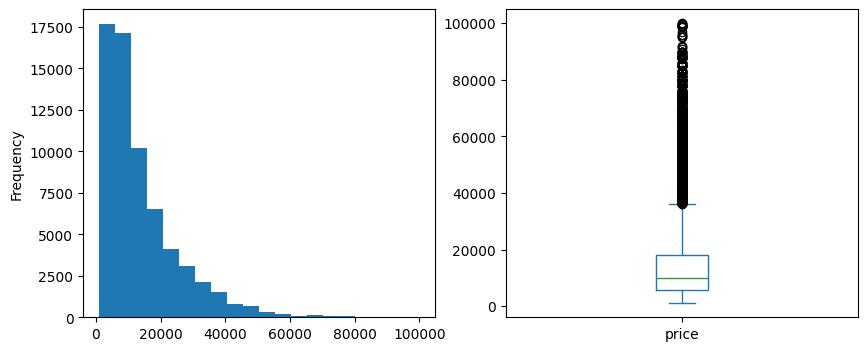

In [ ]:
# Fungsi ini adalah untuk melihat apakah ada outlier di data price
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

data['price'].plot(kind='hist',bins=20,ax=ax[0])
data['price'].plot(kind='box',ax=ax[1])

Terlihat dengan hasil data diatas, untuk kolom price, memiliki nilai outlier di harga 40.000 ke atas

Selanjutnya akan dilakukan metode Z SCORE apakah masih ada outlier atau tidak

In [68]:
avg = data['price'].mean()
std = data['price'].std()

up_bound = avg + 3*std
low_bound = avg - 3*std

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 62465.89
Lower Boundary: -21963.97


In [69]:
outlier = data['price'][(data['price']<low_bound) | (data['price']>up_bound)]
no_outlier = data['price'][(data['price']>=low_bound) & (data['price']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(data["price"]):.2f}%%')

Percentage of outliers: 1.59%%


<Axes: >

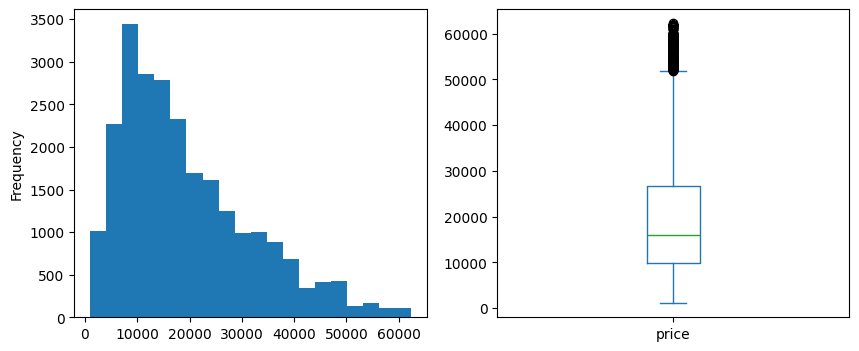

In [70]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

Dari hasil metode z score, masih terdapat outlier dari kolom harga

Selanjutnya mencoba untuk menggunakan metode Tukeys Rule apakah tetap ada outlier atau tidak

Skew Distribution: Tukey's Rule

In [71]:
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 52515.00
Lower Boundary: -15525.00


In [72]:
outlier = data['price'][(data['price']<low_bound) | (data['price']>up_bound)]
no_outlier = data['price'][(data['price']>=low_bound) & (data['price']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(data["price"]):.2f}%%')

Percentage of outliers: 3.38%%


<Axes: >

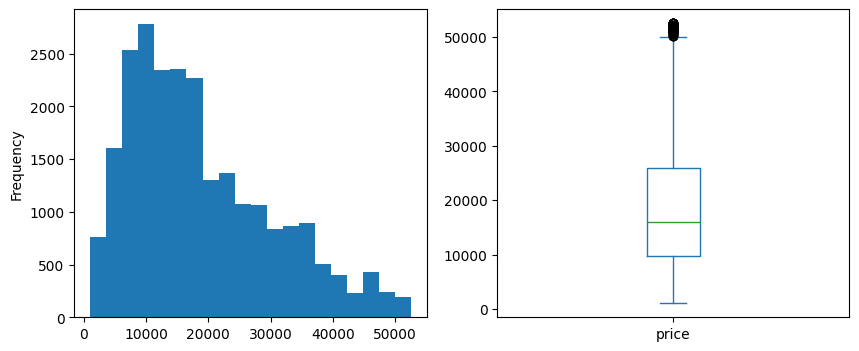

In [73]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

Dari hasil metode tukey rule, tetap terdapat outlier di kolom harga, ini menandakan bahwa beberapa mobil memang memiliki harga yang tinggi, bisa dikarenakan mobil klasik atau merk mobile mewah.

---

### **Menjawab Penjabaran Masalah**

### 1. Merk Mobil mana yang sering di posting

In [75]:
# Gabungkan merek dan model jadi satu kolom baru
data['full_model'] = data['manufacturer'].astype(str) + ' ' + data['model'].astype(str)

# Hitung frekuensi kemunculan tiap model
top_models = data['full_model'].value_counts().head(10)

# Tampilkan
print(top_models)

full_model
ford f-150                   397
chevrolet silverado 1500     322
chevrolet corvette           247
ram 1500                     227
ford mustang                 221
ford super duty f-550 drw    188
jeep wrangler                188
honda civic                  164
toyota tacoma                156
ford transit                 155
Name: count, dtype: int64


<Axes: xlabel='full_model,manufacturer'>

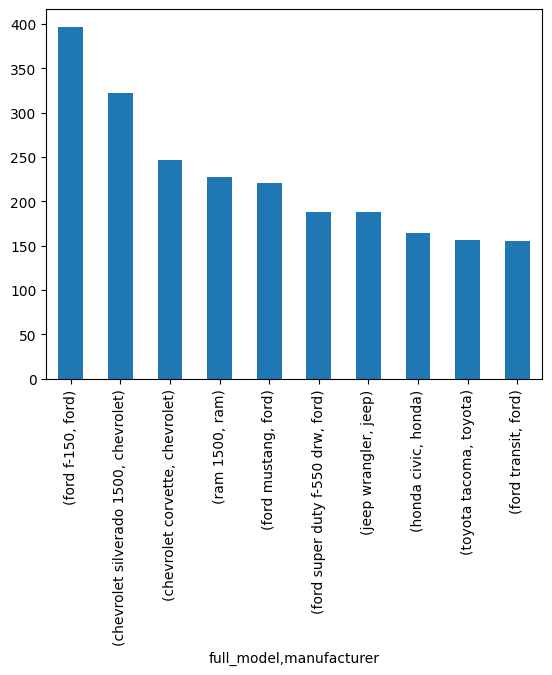

In [76]:
data.groupby('full_model')['manufacturer'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

Dari hasil diatas, didapatkan bahwa mobil ford f-150 merupakan mobil yang sering diposting di website penjualan mobil bekas

---

### 2. Bagaimana distribusi harga mobil bekas

<Axes: xlabel='price', ylabel='Count'>

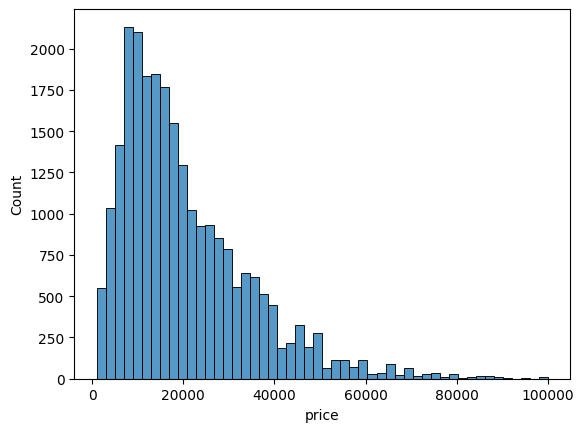

In [47]:
sns.histplot(data['price'], bins=50)

<Axes: xlabel='price', ylabel='Count'>

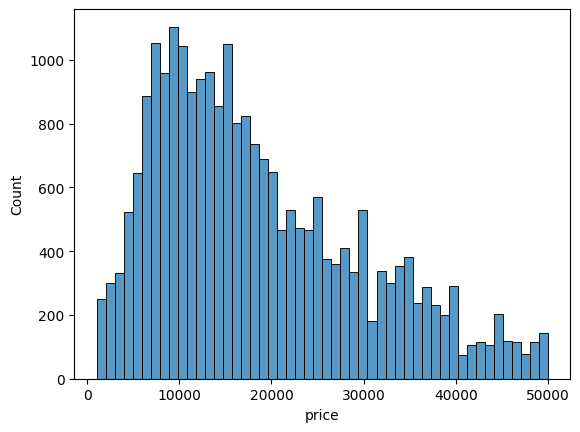

In [43]:
sns.histplot(data[data['price'] < 50000]['price'], bins=50)

Dari hasil pengecekan distribusi harga terlihat bahwa rata rata harga mobil yang terjual adalah di rentang 1000 - 20.000

### 3. Apa merek mobil yang paling mahal rata-rata harganya ?

In [44]:
data.groupby('manufacturer')['price'].mean().round().sort_values(ascending=False).head(10)

manufacturer
ferrari         88246.0
aston-martin    53367.0
tesla           51336.0
ram             34963.0
porsche         32793.0
rover           30419.0
gmc             29718.0
land rover      25972.0
ford            24359.0
lexus           22973.0
Name: price, dtype: float64

In [46]:
data.groupby('manufacturer')['price']\
    .mean()\
    .round()\
    .sort_values(ascending=False)\
    .head(10)\
    .apply(lambda x: f"${int(x):,}")


manufacturer
ferrari         $88,246
aston-martin    $53,367
tesla           $49,015
porsche         $27,845
ram             $24,505
alfa-romeo      $21,796
rover           $20,592
gmc             $20,097
land rover      $18,117
ford            $17,249
Name: price, dtype: object

<Axes: >

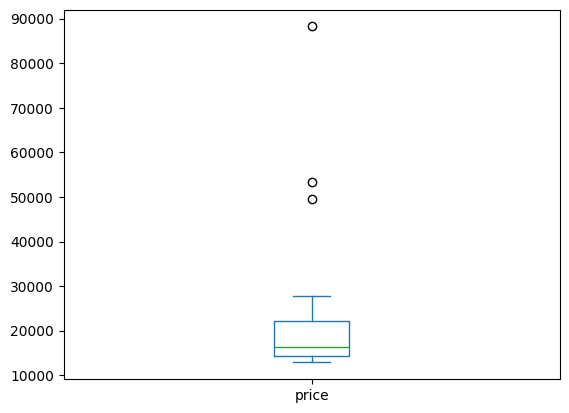

In [21]:
data.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(20).plot(kind='box')

<Axes: xlabel='manufacturer'>

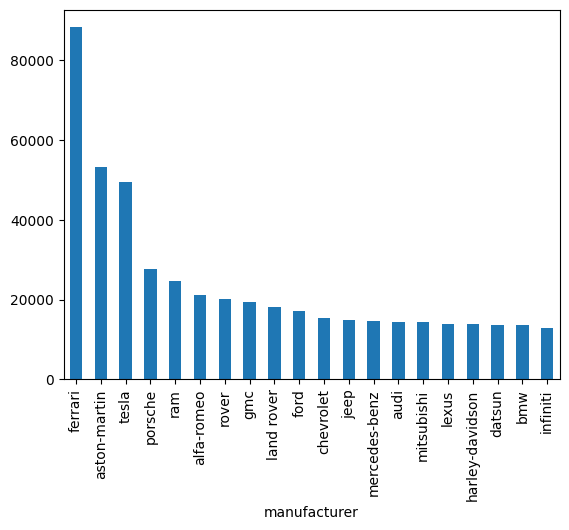

In [22]:
data.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

Dari hasil data diatas, merk mobil yang memiliki harga rata rata tertinggi di penjualan adalah ferarri, aston martin dan tesla, ini menandakan bahwa mobil mobil ini adalah mobil premium walaupun bekas tapi masih memiliki harga jual tinggi

---

### 4. Berapa rata rata harga dari setiap kondisi mobil

In [45]:
print("Good       :", round(data[data['condition'] == 'good']['price'].mean()))
print("Excellent  :", round(data[data['condition'] == 'excellent']['price'].mean()))
print("Fair       :", round(data[data['condition'] == 'fair']['price'].mean()))
print("Like New   :", round(data[data['condition'] == 'like new']['price'].mean()))
print("New        :", round(data[data['condition'] == 'new']['price'].mean()))
print("Salvage    :", round(data[data['condition'] == 'salvage']['price'].mean()))

Good       : 17791
Excellent  : 19940
Fair       : 5763
Like New   : 24358
New        : 31236
Salvage    : 8204


<Axes: xlabel='condition'>

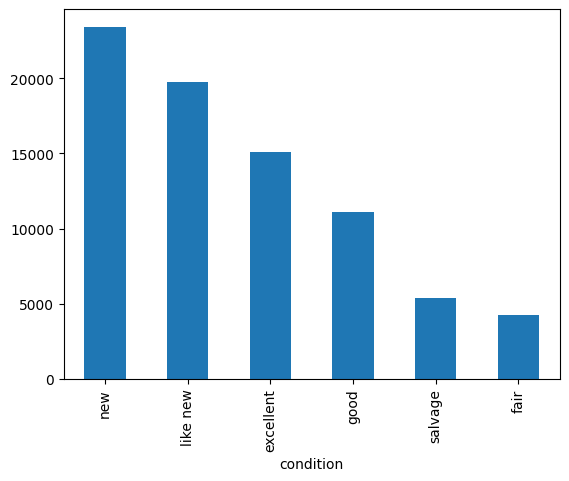

In [30]:
data.groupby('condition')['price'].mean().sort_values(ascending=False).plot(kind='bar')

### 5. Berapa rata-rata, median, dan standar deviasi harga mobil?

statistik deskriptif

In [30]:
data[['price']].describe()

,price
count,64822.000000
mean,13893.498411
std,11908.328589
min,1050.000000
25%,5800.000000
50%,9990.000000
75%,17999.000000
max,99990.000000


### 6. Apakah region mempengaruhi harga mobil ?

H0 = tidak terdapat perbedaan harga mobil berdasarkan region
H1 = terdapat perbedaan harga mobil berdasarkan region

In [25]:
# Filter data untuk menghindari harga 0 atau missing
filtered_data = data[data['price'] > 0]

# Buat list harga per region
grouped_prices = [group['price'].values for name, group in filtered_data.groupby('region')]

# Uji ANOVA
f_stat, p_val = stats.f_oneway(*grouped_prices)

print(f'F-statistic: {f_stat:.2f}')
print(f'P-value: {p_val:.5f}')

# Interpretasi hasil
if p_val < 0.05:
    print("Kesimpulan: Terdapat perbedaan signifikan rata-rata harga antar region.")
else:
    print("Kesimpulan: Tidak ada perbedaan signifikan rata-rata harga antar region.")


F-statistic: 10.37
P-value: 0.00000
Kesimpulan: Terdapat perbedaan signifikan rata-rata harga antar region.


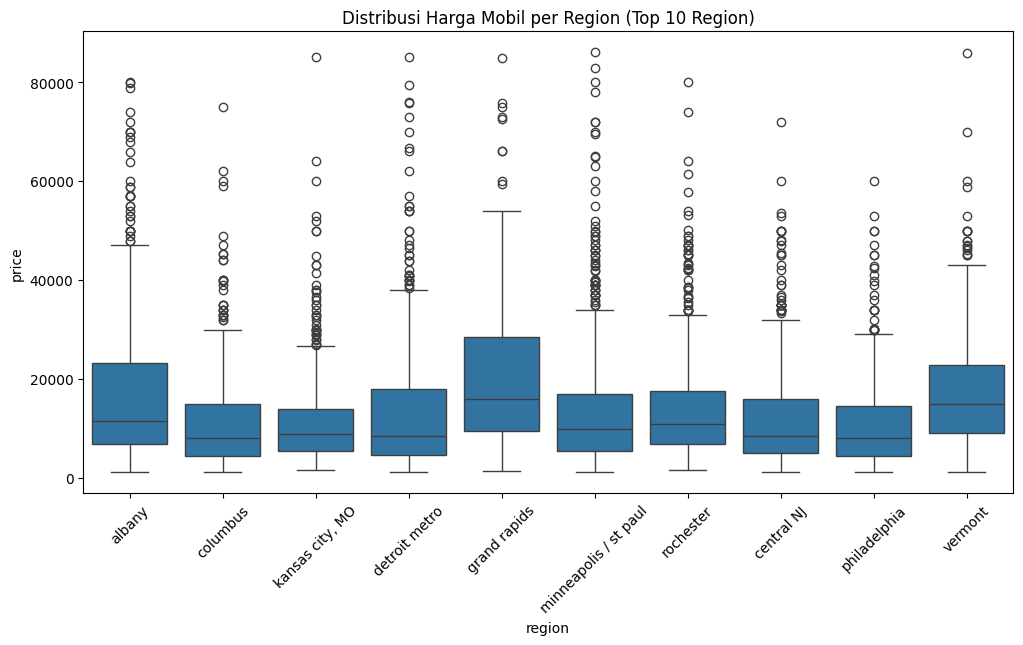

In [ ]:
# Pilih beberapa region dengan data terbanyak
top_regions = data['region'].value_counts().head(10).index
subset = data[data['region'].isin(top_regions)]

plt.figure(figsize=(12,6))
sns.boxplot(data=subset, x='region', y='price')
plt.title('Distribusi Harga Mobil per Region (Top 10 Region)')
plt.xticks(rotation=45)
plt.show()


## **vi. Pengambilan Kesimpulan**

Berdasarkan hasil analisis yang dilakukan terhadap dataset mobil bekas dari Kaggle, dapat disimpulkan beberapa poin utama yang relevan untuk pengambilan keputusan bisnis:

1. Sebaran Harga Tidak Merata (Right-Skewed)  

    Distribusi harga mobil bekas menunjukkan pola right-skewed, artinya sebagian besar mobil dijual di harga rendah hingga menengah, namun terdapat sejumlah kecil mobil yang memiliki harga sangat tinggi.

2. Merek Mobil Mewah Memiliki Harga Tertinggi

    Merek-merek seperti Ferrari dan Aston Martin menempati posisi teratas dalam rata-rata harga jual. Ini menegaskan bahwa mobil mewah memiliki segmentasi pasar tersendiri yang memengaruhi distribusi harga secara keseluruhan.

3. Model Mobil Terpopuler di Pasar

    Model yang paling sering dijual adalah dari pabrikan Ford dan Chevrolet, menandakan tingginya volume dan popularitas model-model dari dua produsen tersebut di pasar mobil bekas.

4. Kondisi "New" Berpengaruh terhadap Harga

    Mobil dalam kondisi "new" memiliki harga rata-rata tertinggi, dibandingkan dengan kondisi lainnya seperti good, fair, atau salvage. Hal ini menunjukkan bahwa kondisi kendaraan sangat memengaruhi nilai jualnya.

5. Statistik Deskriptif Harga Mobil

    Rata-rata harga mobil dalam dataset adalah sekitar $14,021, dengan kondisi "new" sebagai kelompok dengan nilai median harga tertinggi. Hal ini menguatkan temuan bahwa kondisi mobil sangat menentukan nilai.

6. Apakah region mempengaruhi harga mobil

    Hasil uji inferensial (ANOVA) menunjukkan bahwa terdapat perbedaan signifikan rata rata harga antar region. Hal ini menunjukan jika kita menjual mobil dengan region yang berbeda maka harga bisa berbeda juga.

